In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm


In [2]:
df = pd.read_csv("tips (data for regression problem).csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### DATA PRE-PROCESSING

In [3]:
df.shape

(244, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
# Using Feature Engineering
df['tip_percentage'] = df['tip'] / df['total_bill']


In [7]:
X = df.drop(columns=['tip'])
y = df['tip']


In [8]:
categorical_cols = ['sex', 'smoker', 'day', 'time']

In [9]:
numeric_cols = ['total_bill', 'size', 'tip_percentage']

In [10]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### PERFORMING EDA :

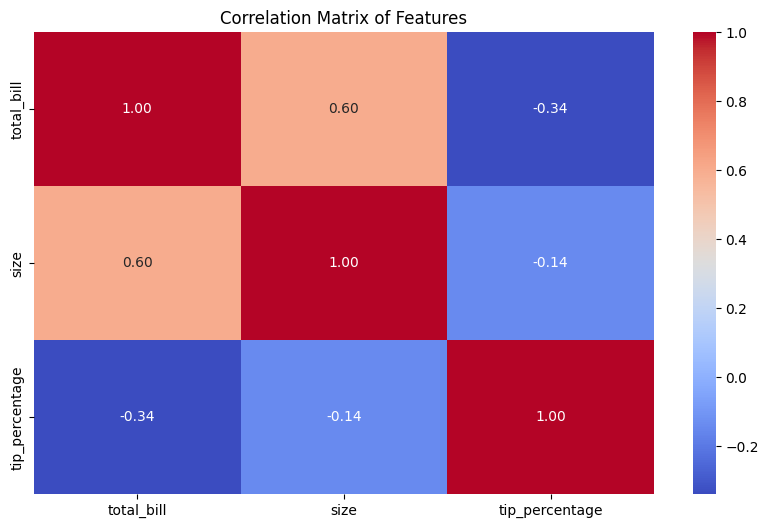

In [11]:
numeric_df = df[numeric_cols]  
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Features")
plt.show()

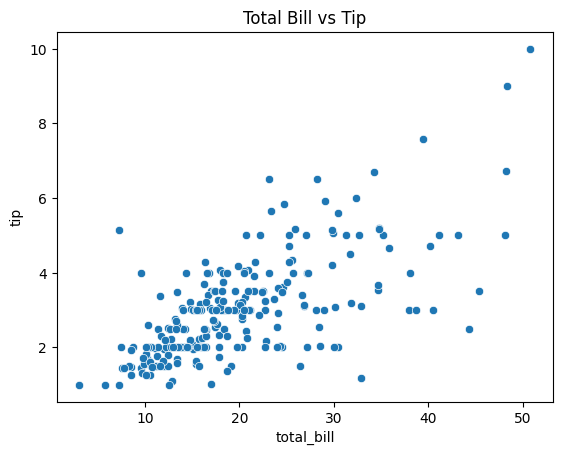

In [12]:
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Total Bill vs Tip')
plt.show()

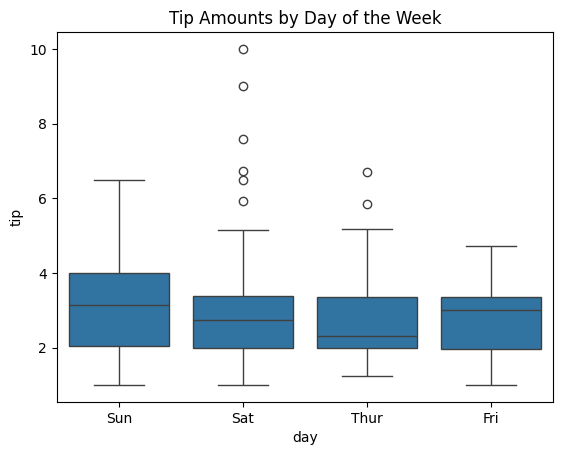

In [13]:
sns.boxplot(x='day', y='tip', data=df)
plt.title('Tip Amounts by Day of the Week')
plt.show()

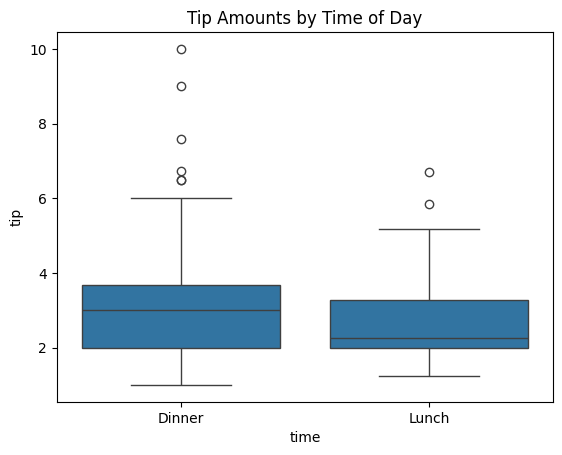

In [14]:
sns.boxplot(x='time', y='tip', data=df)
plt.title('Tip Amounts by Time of Day')
plt.show()

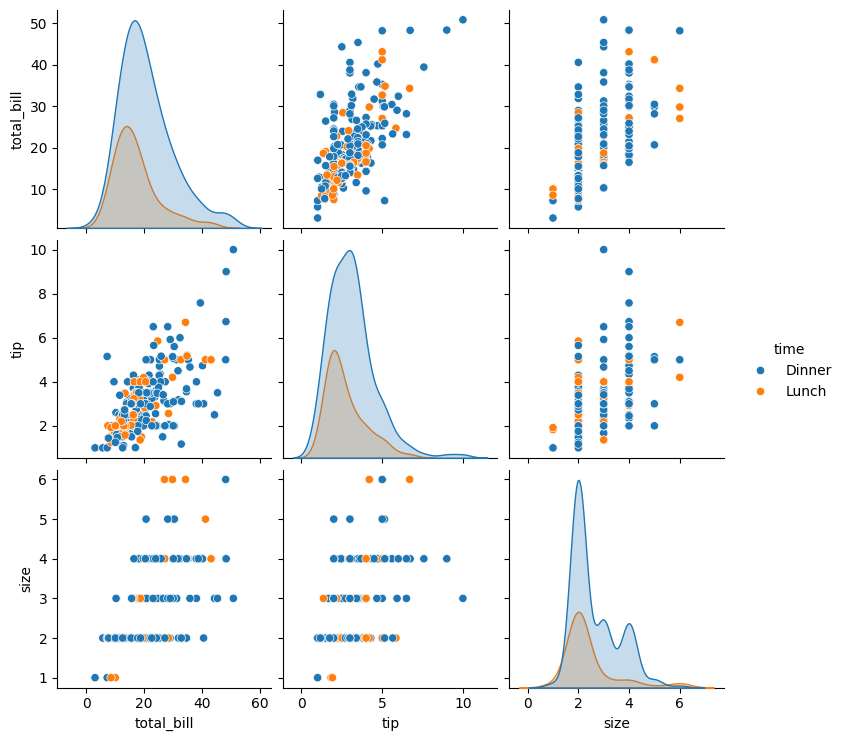

In [15]:
sns.pairplot(df[['total_bill', 'tip', 'size', 'time']], hue='time')
plt.show()

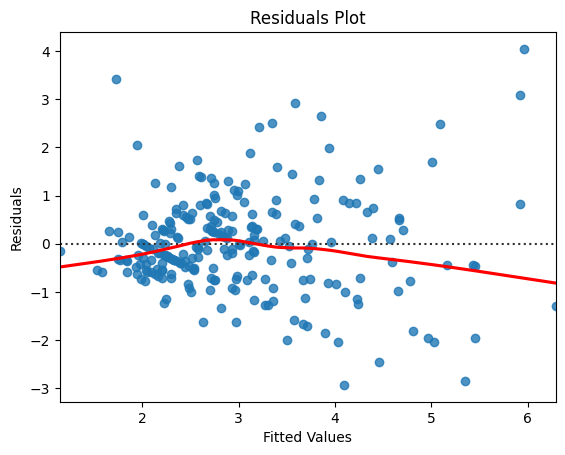

In [16]:
X = df[['total_bill', 'size']]  
y = df['tip'] 

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

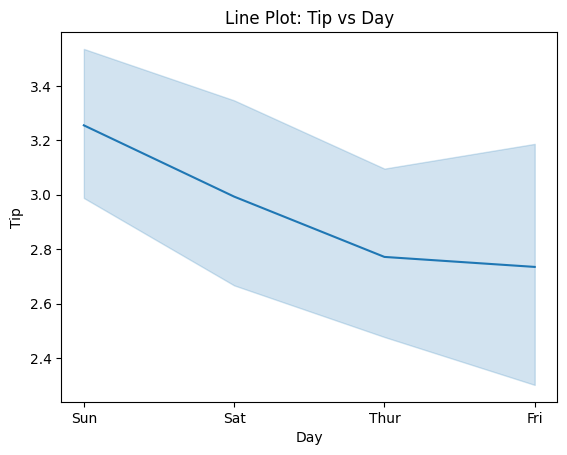

In [17]:
sns.lineplot(x=df['day'], y=df['tip'])
plt.title('Line Plot: Tip vs Day')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.show()



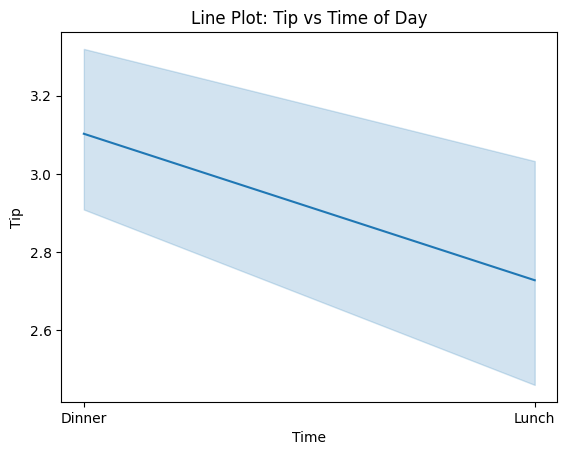

In [18]:
sns.lineplot(x=df['time'], y=df['tip'])
plt.title('Line Plot: Tip vs Time of Day')
plt.xlabel('Time')
plt.ylabel('Tip')
plt.show()

### APPLYING REGRESSION MODELS :

#### 1) LINEAR REGRESSION :

In [19]:
# Linear Regression
linear_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

print("Linear Regression - MSE:", mean_squared_error(y_test, y_pred_linear))
print("Linear Regression - R²:", r2_score(y_test, y_pred_linear))


Linear Regression - MSE: 0.24265125670267848
Linear Regression - R²: 0.8058745445482829


#### 2) RIDGE REGRESSIOM :

In [20]:
ridge_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
print("Ridge Regression - MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression - R²:", r2_score(y_test, y_pred_ridge))


Ridge Regression - MSE: 0.2412158194771861
Ridge Regression - R²: 0.8070229206538


#### 3) LASSO REGRESSION :

In [21]:
lasso_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
print("Lasso Regression - MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Regression - R²:", r2_score(y_test, y_pred_lasso))

Lasso Regression - MSE: 1.4486680232392768
Lasso Regression - R²: -0.15896098636013822


#### 4) DECISION TREE REGRESSION :

In [22]:
dt_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

print("Decision Tree Regression - MSE:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree Regression - R²:", r2_score(y_test, y_pred_dt))

Decision Tree Regression - MSE: 0.24616938775510197
Decision Tree Regression - R²: 0.8030599751857702


#### 5) RANDOM FOREST REGRESSION :

In [23]:
rf_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

print("Random Forest Regression - MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest Regression - R²:", r2_score(y_test, y_pred_rf))

Random Forest Regression - MSE: 0.20188783795918328
Random Forest Regression - R²: 0.8384860271215884


#### 6) SUPPORT VECTOR REGRESSION ( SVR ) : 

In [24]:
svr_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

svr_reg.fit(X_train, y_train)
y_pred_svr = svr_reg.predict(X_test)

print("SVR Regression - MSE:", mean_squared_error(y_test, y_pred_svr))
print("SVR Regression - R²:", r2_score(y_test, y_pred_svr))

SVR Regression - MSE: 0.1383751501952374
SVR Regression - R²: 0.8892973421202408


#### 7) KNN REGRESSION :

In [25]:
knn_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)

print("KNN Regression - MSE:", mean_squared_error(y_test, y_pred_knn))
print("KNN Regression - R²:", r2_score(y_test, y_pred_knn))

KNN Regression - MSE: 0.4959754285714285
KNN Regression - R²: 0.6032105612283591


#### COMPARING ALL THE MODELS :

In [26]:
results = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 
              'Random Forest', 'SVR', 'KNN'],
    'MSE': [mean_squared_error(y_test, y_pred_linear),
            mean_squared_error(y_test, y_pred_ridge),
            mean_squared_error(y_test, y_pred_lasso),
            mean_squared_error(y_test, y_pred_dt),
            mean_squared_error(y_test, y_pred_rf),
            mean_squared_error(y_test, y_pred_svr),
            mean_squared_error(y_test, y_pred_knn)],
    'R²': [r2_score(y_test, y_pred_linear),
           r2_score(y_test, y_pred_ridge),
           r2_score(y_test, y_pred_lasso),
           r2_score(y_test, y_pred_dt),
           r2_score(y_test, y_pred_rf),
           r2_score(y_test, y_pred_svr),
           r2_score(y_test, y_pred_knn)]
}

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='R²', ascending=False))

               Model       MSE        R²
5                SVR  0.138375  0.889297
4      Random Forest  0.201888  0.838486
1   Ridge Regression  0.241216  0.807023
0  Linear Regression  0.242651  0.805875
3      Decision Tree  0.246169  0.803060
6                KNN  0.495975  0.603211
2   Lasso Regression  1.448668 -0.158961


### FACTORS AFFECTING TIPS BASED ON ABOVE ANALYSIS :

1) TOTAL BILL: A higher total bill tends to result in a higher tip amount. This is intuitive, as people usually tip a percentage of the total bill.
2) SIZE : Larger parties in general gave higher tips, likely because they have higher total bills and the tip is distributed among more people.
3) TIME : Tips tend to be higher during dinner than lunch. This could be because dinners are often larger and more expensive.
4) DAY : It can be observed from the analysis that during weekends , tip is generally higher than the weekdays .

### INSIGHTS FOR MANAGEMENT :

1) Focus should be on providing exceptional service during dinner hours when tips are likely to be higher.
2) More experienced staff should be present on weekends as tips seem to hike during weekends .